In [1]:
import collections
import pandas as pd
from tqdm import tqdm
from IPython.display import Image

In [2]:
df = pd.read_csv("../01_data/preprocessedData/dev_questions.csv")

In [3]:
df.head()

,Unnamed: 0,text_title,paragraph_text,question_id,question_text,question_token,question_pos,question_tag,question_parse_tree,correct_answer_text,...,correct_masked_answer_text_token,correct_masked_answer_sentence_token,plausible_answer_text,plausible_answer_sentence,plausible_answer_sentences_token,plausible_answer_char_index,plausible_answer_token_index,plausible_masked_answer_text_token,plausible_masked_answer_sentence_token,paragraph_tokens
0,0,Normans,The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,"['In', 'what', 'country', 'is', 'Normandy', 'l...","['ADP', 'PRON', 'NOUN', 'AUX', 'PROPN', 'VERB'...","['IN', 'WP', 'NN', 'VBZ', 'NNP', 'VBN', '.']",(ROOT\n (SBARQ\n (WHPP (IN In) (WHNP (WDT ...,"['France', 'France', 'France', 'France']",...,"[['the', 'normans', '(', 'norman', ':', 'nourm...","[['the', 'normans', '(', 'norman', ':', 'nourm...",[],[],[],[],[],[],[],"['The', 'Normans', '(', 'Norman', ':', 'Nourma..."
1,1,Normans,The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,"['When', 'were', 'the', 'Normans', 'in', 'Norm...","['ADV', 'AUX', 'DET', 'PROPN', 'ADP', 'PROPN',...","['WRB', 'VBD', 'DT', 'NNPS', 'IN', 'NNP', '.']",(ROOT\n (SBARQ\n (WHADVP (WRB When))\n ...,"['10th and 11th centuries', 'in the 10th and 1...",...,"[['the', 'normans', '(', 'norman', ':', 'nourm...","[['the', 'normans', '(', 'norman', ':', 'nourm...",[],[],[],[],[],[],[],"['The', 'Normans', '(', 'Norman', ':', 'Nourma..."
2,2,Normans,The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,"['From', 'which', 'countries', 'did', 'the', '...","['ADP', 'DET', 'NOUN', 'AUX', 'DET', 'PROPN', ...","['IN', 'WDT', 'NNS', 'VBD', 'DT', 'NNP', 'VB',...",(ROOT\n (SINV\n (PP (IN From) (WHNP (WDT w...,"['Denmark, Iceland and Norway', 'Denmark, Icel...",...,"[['the', 'normans', '(', 'norman', ':', 'nourm...","[['they', 'were', 'descended', 'from', 'norse'...",[],[],[],[],[],[],[],"['The', 'Normans', '(', 'Norman', ':', 'Nourma..."
3,3,Normans,The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,"['Who', 'was', 'the', 'Norse', 'leader', '?']","['PRON', 'AUX', 'DET', 'ADJ', 'NOUN', 'PUNCT']","['WP', 'VBD', 'DT', 'JJ', 'NN', '.']",(ROOT\n (SBARQ\n (WHNP (WP Who))\n (SQ ...,"['Rollo', 'Rollo', 'Rollo', 'Rollo']",...,"[['the', 'normans', '(', 'norman', ':', 'nourm...","[['they', 'were', 'descended', 'from', 'norse'...",[],[],[],[],[],[],[],"['The', 'Normans', '(', 'Norman', ':', 'Nourma..."
4,4,Normans,The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,"['What', 'century', 'did', 'the', 'Normans', '...","['DET', 'NOUN', 'AUX', 'DET', 'PROPN', 'ADV', ...","['WDT', 'NN', 'VBD', 'DT', 'NNPS', 'RB', 'VB',...",(ROOT\n (SBARQ\n (WHNP (WDT What) (NN cent...,"['10th century', 'the first half of the 10th c...",...,"[['the', 'normans', '(', 'norman', ':', 'nourm...","[['the', 'distinct', 'cultural', 'and', 'ethni...",[],[],[],[],[],[],[],"['The', 'Normans', '(', 'Norman', ':', 'Nourma..."


In [4]:
def generate_ngrams(words_list, n):
    ngrams_list = []
 
    for num in range(0, len(words_list)):
        ngram = ' '.join(words_list[num:num + n])
        ngrams_list.append(ngram)
 
    return ngrams_list

In [5]:
import ast
df["question_token"] = [ast.literal_eval(liste) for liste in df["question_token"]]
df["question_tag"] = [ast.literal_eval(liste) for liste in df["question_tag"]]
df["question_pos"] = [ast.literal_eval(liste) for liste in df["question_pos"]]

In [6]:
counter_dict = collections.defaultdict(collections.Counter)

for i, row in tqdm(df.iterrows()):
    counter_dict["counter_len"].update([("{}".format(len(row["question_token"])),)])
    
    for n in range(1,6):
        token_ngrams = generate_ngrams(row["question_token"], n)
        counter_dict["first_counter_{}".format(n)].update([tuple(t.lower() for t in token_ngrams[0])])
        for ngram in token_ngrams:
            counter_dict["counter_{}".format(n)].update([tuple(t.lower() for t in ngram)])

        pos_ngrams = generate_ngrams(row["question_pos"], n)
        for ngram in pos_ngrams:
            counter_dict["pos_counter_{}".format(n)].update([tuple(ngram,)])
        counter_dict["first_pos_counter_{}".format(n)].update([tuple(pos_ngrams[0])])
        
        tag_ngrams = generate_ngrams(row["question_tag"], n)
        for ngram in tag_ngrams:
            counter_dict["tag_counter_{}".format(n)].update([tuple(ngram,)])
        counter_dict["first_tag_counter_{}".format(n)].update([tuple(tag_ngrams[0])])

11873it [00:20, 569.54it/s]


In [7]:
counter_dict["counter_len"].most_common()

[(('10',), 1472),
 (('11',), 1437),
 (('9',), 1406),
 (('8',), 1258),
 (('12',), 1214),
 (('13',), 958),
 (('14',), 769),
 (('7',), 747),
 (('15',), 566),
 (('6',), 405),
 (('16',), 388),
 (('17',), 325),
 (('18',), 205),
 (('5',), 159),
 (('19',), 158),
 (('20',), 111),
 (('21',), 73),
 (('22',), 52),
 (('23',), 39),
 (('4',), 39),
 (('25',), 29),
 (('26',), 14),
 (('24',), 13),
 (('27',), 11),
 (('3',), 8),
 (('28',), 4),
 (('30',), 3),
 (('34',), 2),
 (('33',), 2),
 (('29',), 2),
 (('31',), 2),
 (('32',), 2)]

In [8]:
import os

if not os.path.exists("images"):
    os.mkdir("images")
    
if not os.path.exists("images/questions"):
    os.mkdir("images/questions")

In [9]:
import plotly.express as px
for key in counter_dict.keys():
    df_counter = pd.DataFrame(data=counter_dict[key].most_common(25), columns=["value_tuple", "count"])
    df_counter["value"] = [" ".join(t) for t in df_counter["value_tuple"]]

    fig = px.bar(df_counter, x="value", y="count", title=key, log_y=False)
    
    fig.write_image("images/questions/{}.png".format(key))

In [10]:
index_list = []
rel_index_list = []
pos_list = []
tag_list = []

for i, row in tqdm(df.iterrows()):
    length = len(row["question_token"])
    for index, (token, pos, tag) in enumerate(zip(list(row["question_token"]), list(row["question_pos"]), list(row["question_tag"]))):
        index_list.append(index)
        rel_index_list.append(index/length)
        pos_list.append(pos)
        tag_list.append(tag)

11873it [00:02, 4915.04it/s]


In [11]:
from pandas.core.common import flatten

flatted_tag_list = list(flatten(tag_list))
flatted_pos_list = list(flatten(pos_list))

In [12]:
from collections import Counter
tag_counter = Counter(flatted_tag_list)
pos_counter = Counter(flatted_pos_list)

In [13]:
tag_order = [tag for tag, count in tag_counter.most_common()]
pos_order = [pos for pos, count in pos_counter.most_common()]

## Tags

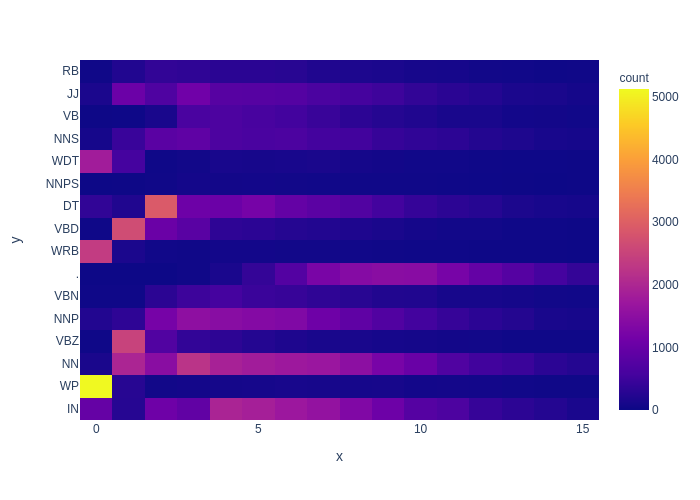

In [14]:
fig = px.density_heatmap(x=index_list, y=tag_list, category_orders={"x":tag_order}, range_x= [-0.5,15.5], range_y=[-0.5,15.5])

filename="images/questions/heatmap_tag_position.png"
fig.write_image(filename)
Image(filename)

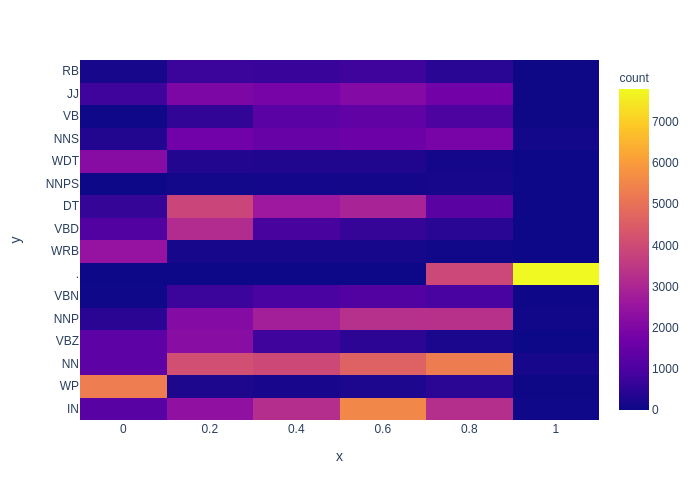

In [15]:
fig = px.density_heatmap(x=rel_index_list, y=tag_list, category_orders={"x":tag_order}, range_y=[-0.5,15.5],nbinsx=5)

filename="images/questions/heatmap_tag_rel_position.png"
fig.write_image(filename)
Image(filename)

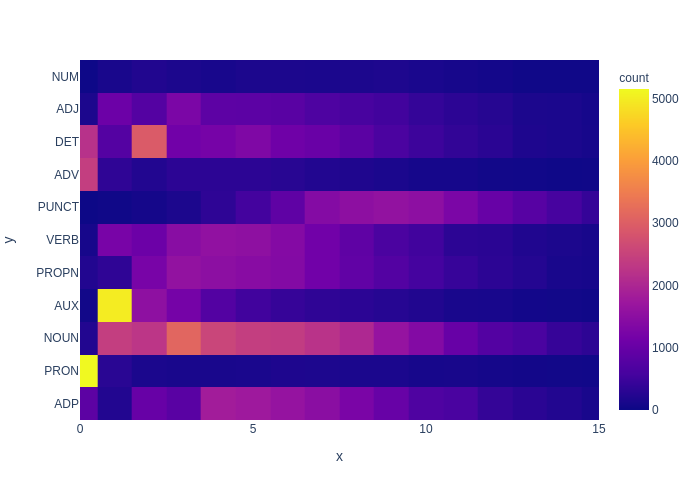

In [16]:
fig = px.density_heatmap(x=index_list, y=pos_list, category_orders={"x":pos_order}, range_x= [0,15], range_y=[-0.5,10.5])

filename="images/questions/heatmap_pos_position.png"
fig.write_image(filename)
Image(filename)